In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
import pandas as pd
df = pd.read_csv("student_Performance.csv")

In [8]:
df.head()

,Name,Previous_Grades,Attendance_Rate,Test_Scores,Study_Hours,Family_Income,Parental_Education,Sleep_Duration,Pass/Fail
0,Student_1,86,77%,96,5.672682,46220,College Graduate,7.164309,Fail
1,Student_2,75,69%,43,6.437878,79680,Postgraduate,8.967443,Pass
2,Student_3,83,67%,94,7.719454,51075,Postgraduate,7.037304,Pass
3,Student_4,60,87%,58,3.810933,98776,Postgraduate,7.891456,Fail
4,Student_5,96,86%,81,1.060219,88148,High School,6.252856,Pass


In [10]:
X = df[['Pass/Fail','Test_Scores']]



In [37]:
X.drop

<bound method DataFrame.drop of     Pass/Fail  Test_Scores
0        Fail           96
1        Pass           43
2        Pass           94
3        Fail           58
4        Pass           81
..        ...          ...
345      Pass           66
346      Pass           91
347      Fail           57
348      Pass           71
349      Pass           41

[350 rows x 2 columns]>

In [38]:
y.drop

<bound method Series.drop of 0      Fail
1      Pass
2      Pass
3      Fail
4      Pass
       ... 
345    Pass
346    Pass
347    Fail
348    Pass
349    Pass
Name: Pass/Fail, Length: 350, dtype: object>

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = LabelEncoder().fit_transform(X_train[column])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)



In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
y_pred = knn.predict(X_test_scaled)


In [48]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


LOGISTIC REGRESSION


In [42]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [61]:
pass_fail_counts = df['Pass/Fail'].value_counts()
print(pass_fail_counts)

Pass/Fail
1    181
0    169
Name: count, dtype: int64


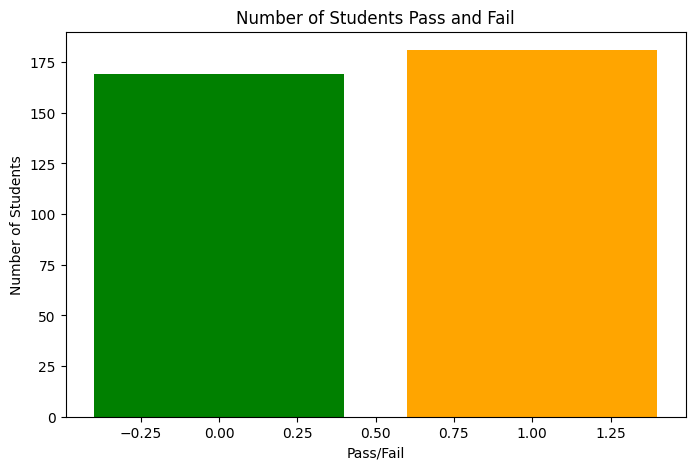

In [75]:

plt.figure(figsize=(8, 5))
plt.bar(pass_fail_counts.index, pass_fail_counts.values, color=['orange', 'green'])
plt.title('Number of Students Pass and Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)  
plt.show()

In [43]:
y_pred = logistic_model.predict(X_test_scaled)

In [67]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test,y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00        38
        Pass       1.00      1.00      1.00        32

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

